### CREDIT RISK MODELING: APPLICATION OF DEEP LEARNING

In [15]:
from collections import Counter

# EDA
import matplotlib.pyplot as plt
import numpy as np

# data manipulation
import pandas as pd
import seaborn as sns
from imblearn.combine import SMOTETomek
from scipy import stats

# feature selection
from sklearn.ensemble import RandomForestClassifier

# algorithms
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.metrics import (
    accuracy_score,
    brier_score_loss,
    classification_report,
    cohen_kappa_score,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
)

# machine learning
from sklearn.model_selection import train_test_split

**Introduction**

- The aim of this project is to use classical machine learning algorithms on a refined dataset and discuss the steps used to predict mortgage default. 

**1. Mortgage Delinquency**

There has been an evolution in the business of lending money as the process has become increasingly complex due to the growing market demands and clients' increasing appetite for credit. These factors among others have led to an increase in regulation and oversight in the banking industry so as to make sure they act responsibly when issuing loans. In the recent past, the rate of digitalization globally has shot up with people in remote parts of the world having access to phones. This has made it possible for people to use mobile devices as a financial medium through which they can send and receive money to and from other people around the world. These transactions happen in a matter of seconds. Many fintechs have taken advantage of this to launch microloans to customers who are low risk. The fintechs use the interaction of the customers with their gadgets to build a credit score for each of the customers and determine the probability of the customer defaulting on a loan. This logic also applies to mortgages and the probability of mortgage default is called mortgage delinquency. Machine learning models are trained on the data we have processed and the decision making process of giving loans is automated.

The machine learning models are used to assess the creditworthiness of a borrower. Before the advent of machine learning, lenders had an established guideline to measure creditworthiness. These guidelines were based on the five C's listed below:

1. Character that looks at the borrower's repayment and credit record.
2. Capacity that assess the borrower's ability to service the loan by looking at the debt-to-income ratio.
3. Capital that looks at the down payment the borrower has paid. This is used to determine how serious the borrower is.
4. Collateral, which is the asset provided to secure the mortgage, such as another home.
5. Conditions of the borrower's environment, like the state of the economy.

However, this has posed serious challenges to lenders as the number of features are limited in assessing customers' creditworthiness, with potentially credit-worthy clients being denied credit for failing certain criteria, and their inability to keep pace with the technological evolution that has been witnessed in the past decade.

It is because of these limitations that machine learning models are now at the heart of assessing the creditworthiness of borrowers. However, recent research has shown that deep learning has the potential to eclipse machine learning for assessing credit risks. Deep neural networks are great at detecting risky borrowers when the data is unstructured and very complex.

However, the risk of using deep learning models is that in most cases they are not explainable, that is, they are like black boxes and we are in most cases unable to know what happened for us to get a certain output. Currently, a lot of research is being done to address this by focusing on explainable artificial intelligence. In the next section, we are going to show a simple example of using a classical machine learning algorithm to assess credit risk. 

**2. Loading Data**

We skip the process of performing EDA as the data is already processed.
- Person Age, Person Income, Person Employment Length, Loan Amount, Loan interest rate, Loan percent income and Person credit history length were transformed using min max scaler, that is, converting the values to range between 0 and 1.
- The other columns were categorical and we therefore converted them to numerical data by one hot encoding the columns.

In [16]:
df = pd.read_csv("credit_sample.csv")
df.head()

,loan_status,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0.015625,0.002751,0.121951,0.014493,0.321348,0.120482,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0.078125,0.002751,0.024390,0.144928,0.418539,0.686747,0.035714,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1,0.046875,0.030209,0.097561,1.000000,0.551124,0.638554,0.000000,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0.062500,0.024757,0.195122,1.000000,0.497191,0.662651,0.071429,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,0.015625,0.002898,0.048780,0.057971,0.096629,0.301205,0.000000,0,0,...,1,1,0,0,0,0,0,0,1,0


In [17]:
df.shape

(29459, 27)

In [18]:
df.dtypes

loan_status                         int64
person_age                        float64
person_income                     float64
person_emp_length                 float64
loan_amnt                         float64
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
person_home_ownership_MORTGAGE      int64
person_home_ownership_OTHER         int64
person_home_ownership_OWN           int64
person_home_ownership_RENT          int64
loan_intent_DEBTCONSOLIDATION       int64
loan_intent_EDUCATION               int64
loan_intent_HOMEIMPROVEMENT         int64
loan_intent_MEDICAL                 int64
loan_intent_PERSONAL                int64
loan_intent_VENTURE                 int64
loan_grade_A                        int64
loan_grade_B                        int64
loan_grade_C                        int64
loan_grade_D                        int64
loan_grade_E                        int64
loan_grade_F                      

In [19]:
df.loan_status.value_counts()

loan_status
0    22996
1     6463
Name: count, dtype: int64

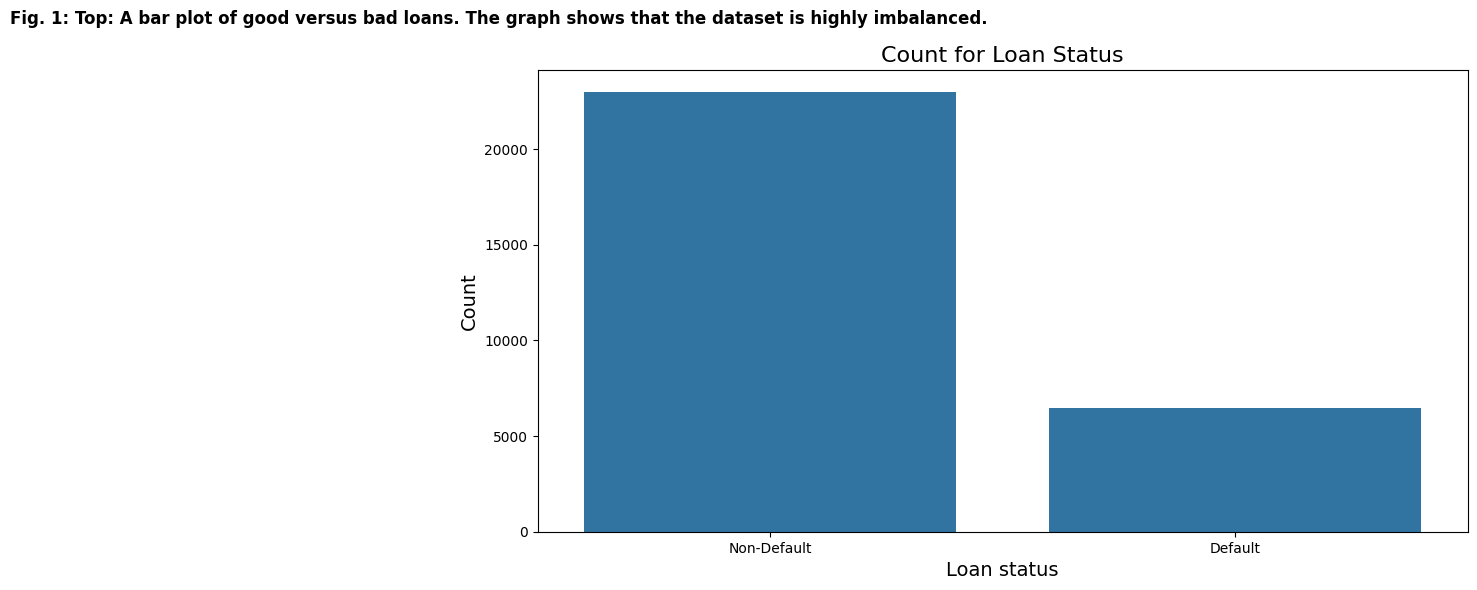

In [20]:
# plots count
ax = sns.countplot(x=df["loan_status"])

# sets the figure size in inches
ax.figure.set_size_inches(12, 6)

# set plot features
ax.set_title("Count for Loan Status", fontsize=16)
ax.set_ylabel("Count", fontsize=14)
ax.set_xlabel("Loan status", fontsize=14)

# set `xticks` labels
plt.xticks([0, 1], ["Non-Default", "Default"])

plt.suptitle(
    "Fig. 1: Top: A bar plot of good versus bad loans. The graph shows that the dataset is highly imbalanced.",
    fontweight="bold",
    horizontalalignment="right",
)

# displays plot
plt.show()

In [21]:
# Seperating the data for easier analysis
df_default = df[df["loan_status"] == 1].copy()
df_non_default = df[df["loan_status"] == 0].copy()

# Counts the number of defaults and non defaults 
total_default = df_default.shape[0]
total_non_default = df_non_default.shape[0]
total_loans = df.shape[0]

print("Number of default cases:", total_default)
print(
    "This is equivalent to {:.2f}% of the total loans".format(
        (total_default / total_loans) * 100
    )
)

print("\nNumber of non-defualt cases:", total_non_default)
print(
    "This is equivalent to {:.2f}% of the total loans".format(
        (total_non_default / total_loans) * 100
    )
)

Number of default cases: 6463
This is equivalent to 21.94% of the total loans

Number of non-defualt cases: 22996
This is equivalent to 78.06% of the total loans


**Split Dataset into Train and Test**

In [22]:
# creates the X and y data sets
X = df.drop("loan_status", axis=1).values
y = df["loan_status"].values

# splits into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=2022, stratify=y
)

**Balancing Data for Training**

- Since we saw the data was highly imbalanced, we perform oversampling with synthetic minority over-sampling technique (SMOTE):

In [23]:
# counts the number of classes before oversampling
print("Before balancing:", Counter(y_train))

# defines the resampler
resampler = SMOTETomek(random_state=2022, n_jobs=-1)

# transforms the data set
X_balanced, y_balanced = resampler.fit_resample(X_train, y_train)

# counts the number of classes after oversampling
print("After balancing:", Counter(y_balanced))

Before balancing: Counter({np.int64(0): 17247, np.int64(1): 4847})
After balancing: Counter({np.int64(1): 16988, np.int64(0): 16988})


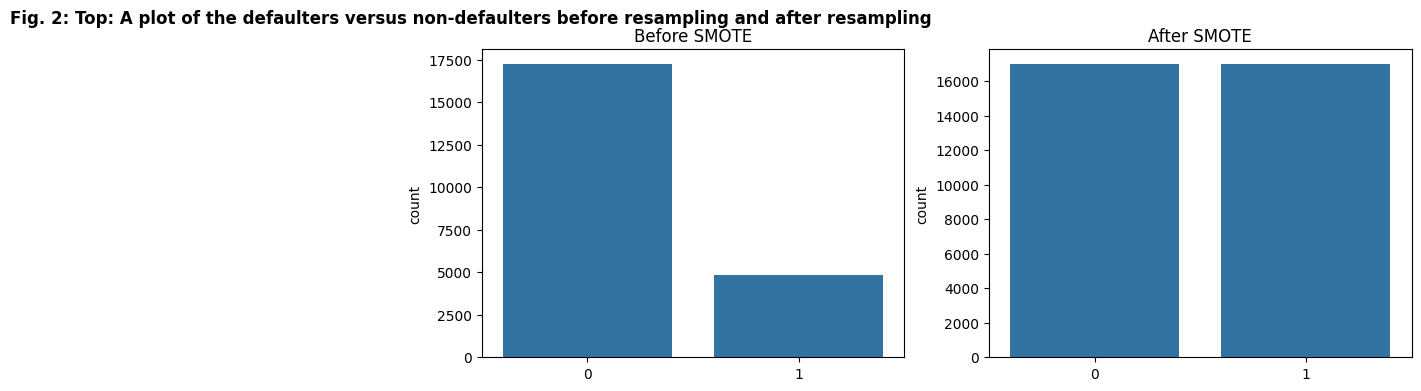

In [24]:
# plots before and after SMOTE
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Before SMOTE")

plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced)
plt.title("After SMOTE")

plt.suptitle(
    "Fig. 2: Top: A plot of the defaulters versus non-defaulters before resampling and after resampling",
    fontweight="bold",
    horizontalalignment="right",
)

plt.show()

In [25]:
print("Total records BEFORE:", X_train.shape[0])
print("Total records AFTER:", X_balanced.shape[0])
print("Difference =", X_train.shape[0] - X_balanced.shape[0])

Total records BEFORE: 22094
Total records AFTER: 33976
Difference = -11882


**Training the Models and Getting the Performance Metrics**

As the process of model building affects the business, a discussion with business owners on the objective of the model will highly affect how we set thresholds. If the purpose is customer acquisition at the expense of risk, we can always lower the threshold of probability so as to get as many customers as possible. If we are interested in optimizing to get high profits or minimize high risks, then we can increase the threshold.

In [26]:
THRESHOLD = 0.05

In [27]:
# list of classifiers
classifiers = [
    LogisticRegression(max_iter=220, random_state=2022),
    RandomForestClassifier(random_state=2022)
]

The function below trains the models on the dataset and evaluates their performance.

In [28]:
def calculate_model_metrics(model, X_test, y_test, model_probs, threshold):
    """
    Calculates Accuracy, F1-Score, PR AUC
    """

    # keeps probabilities for the positive outcome only
    probs = pd.DataFrame(model_probs[:, 1], columns=["prob"])

    # applies the threshold
    y_pred = probs["prob"].apply(lambda x: 1 if x > threshold else 0)

    # calculates f1-score
    f1 = f1_score(y_test, y_pred)

    # calculates accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # calculates kappa score
    kappa = cohen_kappa_score(y_test, y_pred)

    # calculates AUC
    auc_score = roc_auc_score(y_test, y_pred)

    # calculates precision 
    precision = precision_score(y_test, y_pred)

    # calculates the recall
    recall = recall_score(y_test, y_pred)

    return accuracy, kappa, f1, auc_score, precision, recall

In [32]:
def get_classifiers_performance(
        X_train, X_test, y_train, y_test, threshold, classifiers
):
    # creates empty data frame
    df_performance = pd.DataFrame()

    for clf in classifiers:
        print("Training" + type(clf).__name__+"...")
        # fits the classifier to training data
        clf.fit(X_train, y_train)

        # predict the probabilities 
        clf_probs = clf.predict_proba(X_test)

        # calculates model metrics 
        (
            clf_accuracy,
            clf_kappa,
            clf_f1,
            clf_auc,
            clf_precision,
            clf_recall,
        ) = calculate_model_metrics(clf, X_test, y_test, clf_probs, threshold)

        # creates a dict
        clf_dict = {
            "model": [type(clf).__name__, "---"],
            "precision": [clf_precision, np.nan],
            "recall": [clf_recall, np.nan],
            "f1-score": [clf_f1, np.nan], 
            "ROC AUC": [clf_auc, np.nan],
            "accuracy": [clf_accuracy, np.nan],
            "cohen kappa": [clf_kappa, np.nan],
            }
        
        # concatenate Data Frame
        df_performance = pd.concat([df_performance, pd.DataFrame(clf_dict)])

    # resets Data Frame index
    df_performance = df_performance.reset_index()

    # drops index
    df_performance.drop("index", axis = 1, inplace=True)

    # gets only the odd numbered rows 
    rows_to_drop = np.arange(1, len(classifiers) * 2, 2)

    # drops unwanted rows that have no data
    df_performance.drop(rows_to_drop, inplace=True)

    # returns performance summary
    return df_performance

In [34]:
# calculates classifiers performance
df_performances = get_classifiers_performance(
    X_balanced, X_test, y_balanced, y_test, THRESHOLD, classifiers
)
# highlight max values for each  column
df_performances.style.highlight_max()

TrainingLogisticRegression...
TrainingRandomForestClassifier...


,model,precision,recall,f1-score,ROC AUC,accuracy,cohen kappa
0,LogisticRegression,0.240203,0.997525,0.387174,0.555294,0.307128,0.051839
2,RandomForestClassifier,0.303147,0.977723,0.462800,0.672980,0.501969,0.192214


**Probability Distribution**